# CS5830 Project 5: Naive Bayes

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.feature_extraction.text import CountVectorizer

# Models
from sklearn.naive_bayes import MultinomialNB

In [35]:
# Download dataset from https://www.kaggle.com/datasets/saurabhshahane/fake-news-classification
df = pd.read_csv('data/WELFake_Dataset.csv', index_col=0)
df = df.dropna()
df

,title,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1
...,...,...,...
72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0
72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1
72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0
72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0


In [36]:
# average='binary', pos_label=0 == Only report scores for predicting fake news
def get_scores(y_label, y_pred):
    precision, recall, f1score, support = precision_recall_fscore_support(y_label, y_pred, average='binary')
    print(f'Precision: {round(precision, 4)}')
    print(f'f1-score: {round(f1score, 4)}')

def print_confusion_matrix(y_label, y_pred):
    confusion_matrix = pd.crosstab(y_label, y_pred, rownames=['Actual'], colnames=['Predicted'])
    percent_matrix = confusion_matrix.apply(lambda x: x / x.sum() * 100, axis=1)
    percent_matrix = percent_matrix.round(2).astype(str) + '%'
    sns.heatmap(confusion_matrix, annot=percent_matrix, fmt='', cmap='Oranges', )

<53652x27536 sparse matrix of type '<class 'numpy.int64'>'
	with 462677 stored elements in Compressed Sparse Row format>

Precision: 0.879
f1-score: 0.8826


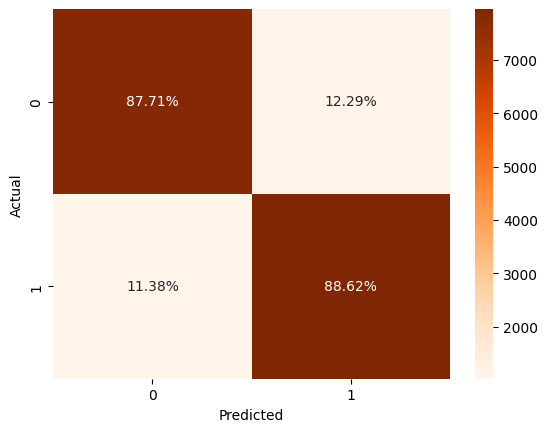

In [37]:
X_train, X_test, y_train, y_test = train_test_split(df[['title', "text"]], df['label'])

# Use count vectorizor for title
cv = CountVectorizer(stop_words='english')
X_train_counts = cv.fit_transform(X_train["title"])
X_test_counts = cv.transform(X_test["title"])
display(X_train_counts)

mnb = MultinomialNB()
mnb.fit(X_train_counts, y_train)
y_pred_title = mnb.predict(X_test_counts)

get_scores(y_test, y_pred_title)
print_confusion_matrix(y_test, y_pred_title)

In [38]:
vocabulary = cv.get_feature_names_out()

coefficients = mnb.feature_log_prob_
most_influential_word_indices = np.argsort(-coefficients, axis=1)
most_influential_words = [vocabulary[idx] for idx in most_influential_word_indices]

fake_news_words = set(most_influential_words[0][:100])
real_news_words = set(most_influential_words[1][:100])

fake_news_unique_words = fake_news_words - real_news_words
real_news_unique_words = real_news_words - fake_news_words

print(f'Most influential fake news words: {fake_news_unique_words}')
print(f'Most influential real news word: {real_news_unique_words}')

Most influential fake news words: {'breitbart', 'military', 'urges', 'chief', 'travel', 'fight', 'ex', 'senate', 'eu', 'presidential', 'probe', 'china', 'say', 'trade', 'israel', 'opposition', 'security', 'pm', 'budget', 'uk', 'border', 'immigration', 'north', 'rights', 'foreign', 'deal', 'turkey', 'sanctions', 'poll', 'case', 'tax', 'saudi', 'iran', 'supreme', 'policy', 'britain', 'minister', 'killed', 'leader', 'debate', 'administration', 'meet', 'times', 'congress', 'brexit', 'obamacare', 'plan', 'official', 'governor', 'talks', 'officials', 'factbox', 'france', 'german', 'korea', 'ban', 'york', 'tillerson', 'islamic', 'syria', 'mexico', 'senator', 'lawmakers', 'exclusive', 'nuclear', 'south'}
Most influential real news word: {'world', 'cnn', 'make', 'democrat', 'liberal', 'like', 'did', 'rally', 'speech', 'tells', 'supporter', 'year', 'illegal', 'truth', 'day', 'american', '2016', 'watch', 'don', 'tweets', 'email', 'gets', 'fox', 'tweet', 'right', 'cruz', 'wikileaks', 'black', 'wow

Precision: 0.9043
f1-score: 0.8903


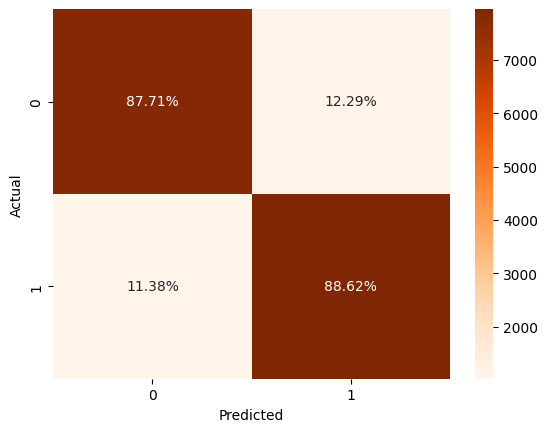

In [41]:
X_train_counts = cv.fit_transform(X_train["text"])
X_test_counts = cv.transform(X_test["text"])

mnb.fit(X_train_counts, y_train)
y_pred_text = mnb.predict(X_test_counts)

get_scores(y_test, y_pred_text)
print_confusion_matrix(y_test, y_pred_text)

In [40]:
# Vote using a simple logical OR
y_pred_combined = y_pred_title | y_pred_text

get_scores(y_test, y_pred_combined)

Precision: 0.8471
f1-score: 0.8969
